In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(root_mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(root_mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    

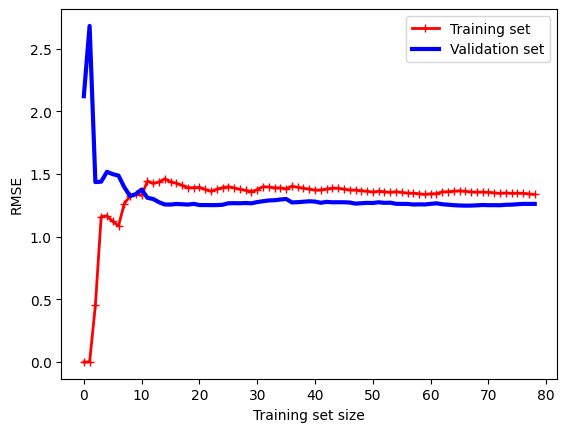

In [5]:
plot_learning_curve(LinearRegression(), X, y)

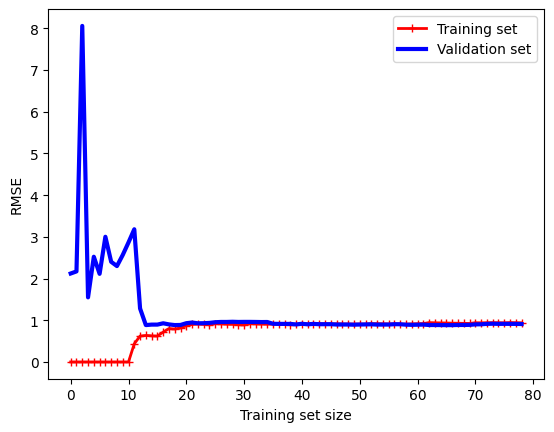

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curve(polynomial_regression, X, y)

#  There is a gap between the curves. This means that the model performs signifi‐
# cantly better on the training data than on the validation data, which is the hall‐
# mark of an overfitting model. However, if you used a much larger training set,
# the two curves would continue to get closer.

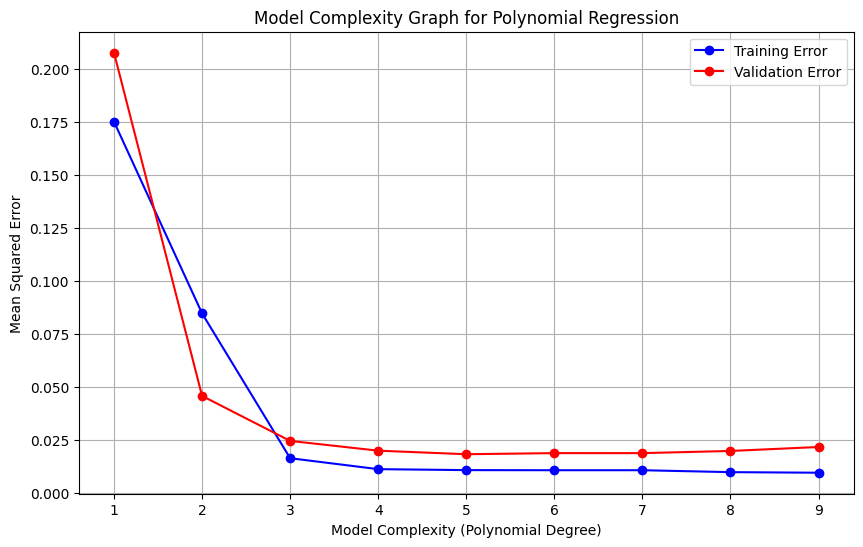

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 1. Setup dummy data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Define range of complexity (Tree Depth)
# depths = range(1, 15)
train_errors, test_errors = [], []

# for d in depths:
#     model = DecisionTreeRegressor(max_depth=d)
#     model.fit(X_train, y_train)
    
#     # Predict and calculate MSE
#     train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
#     test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# # 3. Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(depths, train_errors, label='Training Error', color='blue', marker='o')
# plt.plot(depths, test_errors, label='Validation Error', color='red', marker='o')
# plt.xlabel('Model Complexity (Max Depth)')
# plt.ylabel('Mean Squared Error')
# plt.title('Model Complexity Graph')
# plt.legend()
# plt.grid(True)
# plt.show()

degrees = range(1, 10)
for degree in degrees:
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', color='blue', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', color='red', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity Graph for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()